# **Load Data**

In [1]:
! pip install -q kaggle

In [2]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle competitions download -c digit-recognizer

  0% 0.00/15.3M [00:00<?, ?B/s]
100% 15.3M/15.3M [00:00<00:00, 189MB/s]


In [7]:
! unzip "/content/digit-recognizer.zip" -d "/content/digit-recognizer"

Archive:  /content/digit-recognizer.zip
  inflating: /content/digit-recognizer/sample_submission.csv  
  inflating: /content/digit-recognizer/test.csv  
  inflating: /content/digit-recognizer/train.csv  


# **The First Model**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [9]:
import pandas as pd

df = pd.read_csv("/content/digit-recognizer/sample_submission.csv")
print(df)

       ImageId  Label
0            1      0
1            2      0
2            3      0
3            4      0
4            5      0
...        ...    ...
27995    27996      0
27996    27997      0
27997    27998      0
27998    27999      0
27999    28000      0

[28000 rows x 2 columns]


In [10]:
df_test = pd.read_csv("/content/digit-recognizer/test.csv")
print(df)

       ImageId  Label
0            1      0
1            2      0
2            3      0
3            4      0
4            5      0
...        ...    ...
27995    27996      0
27996    27997      0
27997    27998      0
27998    27999      0
27999    28000      0

[28000 rows x 2 columns]


In [11]:
import pandas as pd
df_train = pd.read_csv("/content/digit-recognizer/train.csv")
print(df)

       ImageId  Label
0            1      0
1            2      0
2            3      0
3            4      0
4            5      0
...        ...    ...
27995    27996      0
27996    27997      0
27997    27998      0
27998    27999      0
27999    28000      0

[28000 rows x 2 columns]


In [12]:
train_data = pd.read_csv('/content/digit-recognizer/train.csv')
test_data = pd.read_csv('/content/digit-recognizer/test.csv')

In [13]:
X_train = train_data.drop(columns=['label']).values / 255.0
Y_train = train_data['label'].values
X_test = test_data.values / 255.0

In [14]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [15]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=46)

In [16]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False
)
datagen.fit(X_train)

# **The Model**

In [17]:
# Initialize the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [20]:
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=64),
    epochs=10,
    validation_data=(X_val, Y_val),
    verbose=2,
    steps_per_epoch=X_train.shape[0] // 64,
    callbacks=[learning_rate_reduction]
)

Epoch 1/10
590/590 - 26s - loss: 0.3832 - accuracy: 0.8751 - val_loss: 0.0634 - val_accuracy: 0.9829 - lr: 0.0010 - 26s/epoch - 43ms/step
Epoch 2/10
590/590 - 13s - loss: 0.1238 - accuracy: 0.9633 - val_loss: 0.0390 - val_accuracy: 0.9867 - lr: 0.0010 - 13s/epoch - 23ms/step
Epoch 3/10
590/590 - 13s - loss: 0.0964 - accuracy: 0.9714 - val_loss: 0.0399 - val_accuracy: 0.9888 - lr: 0.0010 - 13s/epoch - 23ms/step
Epoch 4/10
590/590 - 13s - loss: 0.0836 - accuracy: 0.9753 - val_loss: 0.0275 - val_accuracy: 0.9921 - lr: 0.0010 - 13s/epoch - 22ms/step
Epoch 5/10
590/590 - 13s - loss: 0.0706 - accuracy: 0.9789 - val_loss: 0.0310 - val_accuracy: 0.9907 - lr: 0.0010 - 13s/epoch - 22ms/step
Epoch 6/10
590/590 - 13s - loss: 0.0640 - accuracy: 0.9799 - val_loss: 0.0233 - val_accuracy: 0.9933 - lr: 0.0010 - 13s/epoch - 23ms/step
Epoch 7/10
590/590 - 13s - loss: 0.0590 - accuracy: 0.9828 - val_loss: 0.0193 - val_accuracy: 0.9936 - lr: 0.0010 - 13s/epoch - 22ms/step
Epoch 8/10
590/590 - 13s - loss: 0

In [21]:
loss, accuracy = model.evaluate(X_train, Y_train)
print("Final training loss: {:.8f}".format(loss))
print("Final training accuracy: {:.4%}".format(accuracy))

1182/1182 [==============================] - 4s 3ms/step - loss: 0.0198 - accuracy: 0.9939
Final training loss: 0.01980333
Final training accuracy: 99.3862%


In [22]:
y_pred_test = model.predict(X_test)
y_pred_test = np.argmax(y_pred_test, axis=1)

875/875 [==============================] - 3s 3ms/step


In [23]:
submission = pd.DataFrame({'ImageId': range(1, len(X_test) + 1), 'Label': y_pred_test})
submission.to_csv("tf_mnist_result.csv", index=False)

# **The Result**

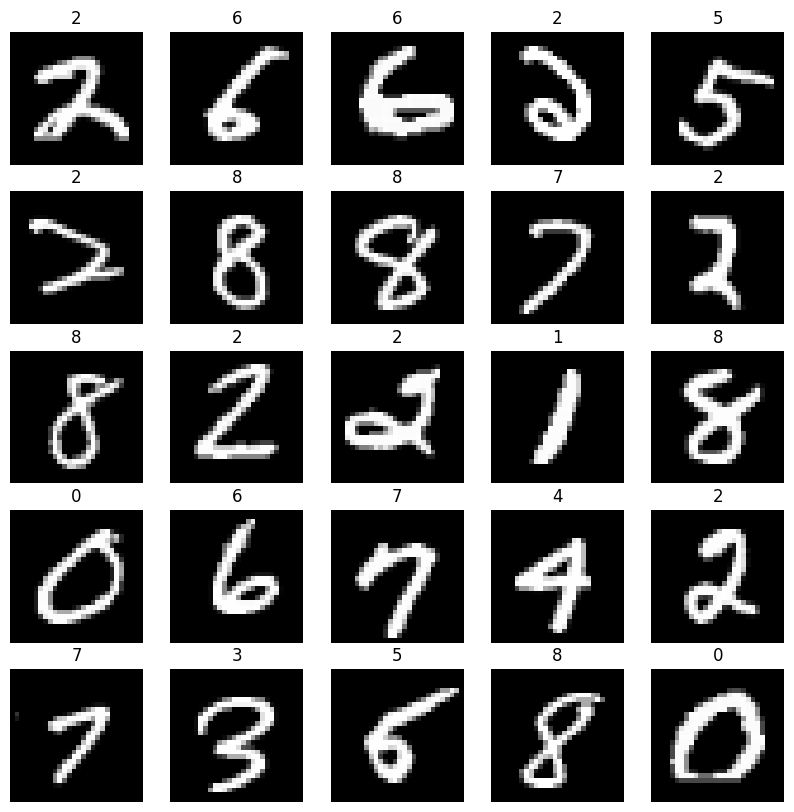

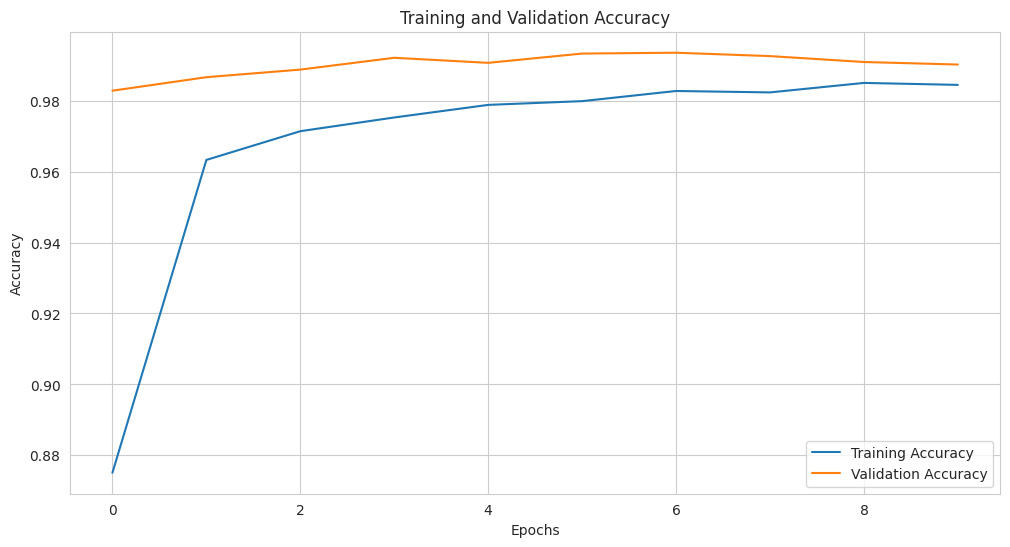

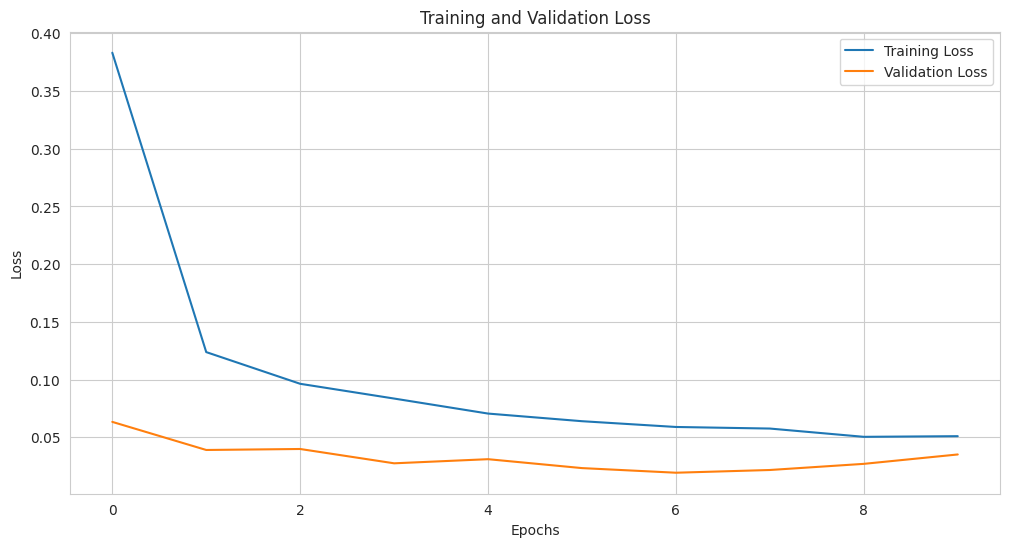

In [24]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(Y_train[i])
    plt.axis('off')

plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# The Second Model

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.utils import make_grid

import warnings
warnings.filterwarnings("ignore")

In [25]:
# Load datasets
train = pd.read_csv('/content/digit-recognizer/train.csv')
test = pd.read_csv('/content/digit-recognizer/test.csv')
sub = pd.read_csv('/content/digit-recognizer/sample_submission.csv')

In [26]:
print(f'Training data size: {train.shape}')
print(f'Testing data size: {test.shape}')

Training data size: (42000, 785)
Testing data size: (28000, 784)


In [27]:
# Create features and targets
y_train = train['label']
X_train = train.drop(columns=['label'])

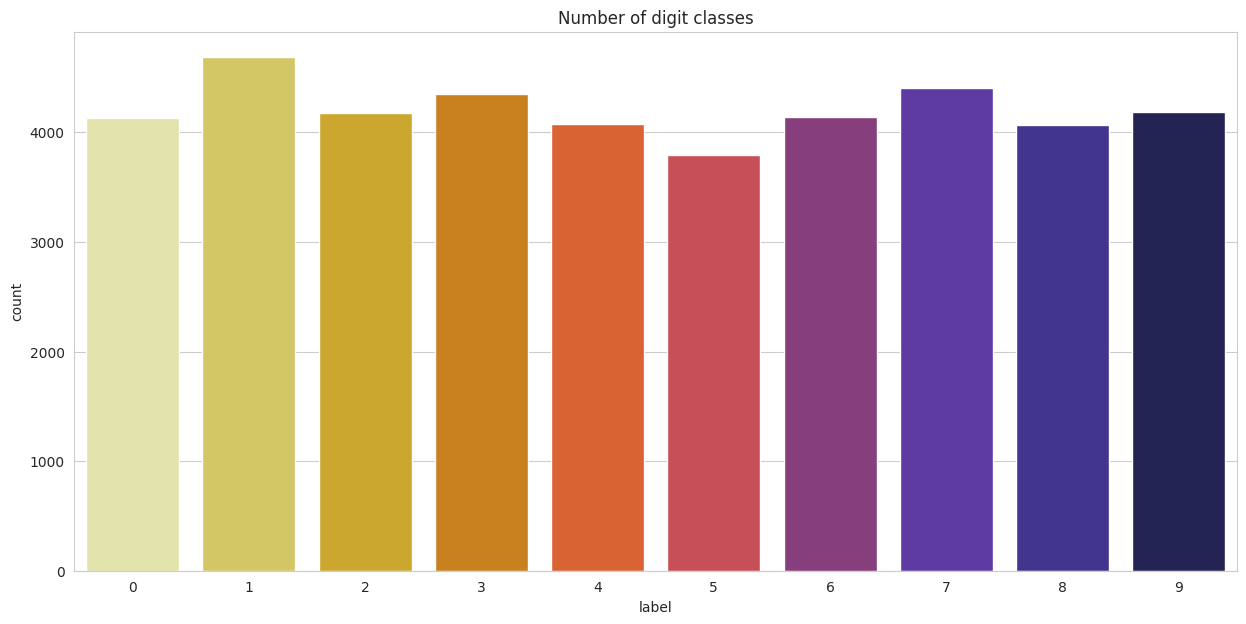

In [28]:
plt.figure(figsize=(15,7))
g = sns.countplot(x=y_train, palette="CMRmap_r")
plt.title("Number of digit classes")
plt.show();

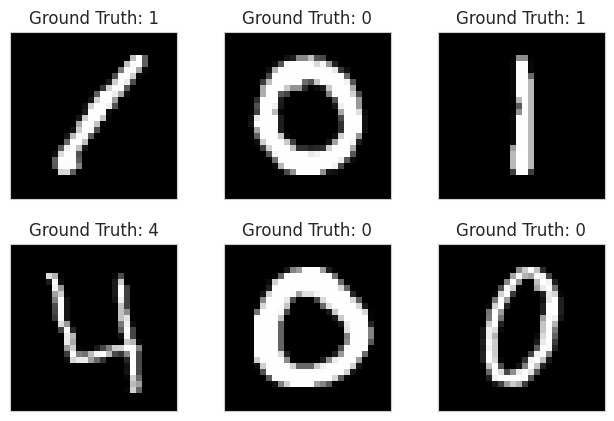

In [29]:
fig = plt.Figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train.values[i].reshape((28, 28)), cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
plt.show();

In [32]:
class DigitDataset(Dataset):
    def __init__(self, X, y, augmentations=None):
        self.inputs = (X / 255.0).to_numpy().astype(np.float32).reshape(-1,1,28,28)
        self.targets = y.values
        self.augmentations = augmentations

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        if self.augmentations is not None:
            return torch.FloatTensor(self.augmentations(img=image)['image']), torch.FloatTensor(label)
        else:
            return torch.tensor(self.inputs[idx, :]), torch.tensor(self.targets[idx])

In [33]:
BATCH_SIZE = 64

# **Split**

In [34]:
# Split our trainset in train and eval
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, train_size=0.8, random_state=1702)

In [35]:
# Create datasets without augmentation
train_set = DigitDataset(X_train, y_train, None)
test_set = DigitDataset(X_eval, y_eval, None)

In [36]:
# Create dataloaders
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_set, batch_size=len(test_set))

# **The Model**

In [37]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)

        return output

In [38]:
LEARNING_RATE = 0.05
MOMENTUM = 0.5
NUM_EPOCH = 10
EVAL_STEP = 1

device = torch.device('cuda' if torch.cuda.is_available() else 'GPU')

model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

In [39]:
def train(model, device, train_loader, criterion, optimizer, train_loss_collector):
    model.train()
    for epoch in range(NUM_EPOCH):
        epoch_loss = list()
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            epoch_loss.append(loss.item())
            pred = torch.max(output.data, 1)[1]
        train_loss_collector.append(np.round(np.mean(epoch_loss),5))
        print(f'Epoch: {epoch}/{NUM_EPOCH} \t Loss: {np.round(np.mean(epoch_loss),5)}')
        if epoch % EVAL_STEP == 0:
            evaluation(model, device, test_loader, criterion, test_loss_collector)

In [40]:
def evaluation(model, device, test_loader, criterion, test_loss_collector):
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            preds = output.argmax(dim=1, keepdim=True)
            correct += preds.eq(target.view_as(preds)).sum().item()
            test_loss_collector.append(loss.item())
    print(f'Test loss: {np.round(loss.item(), 2)} Accuracy: {correct}/{len(test_loader.dataset)}'
          f' - {np.round(100. * correct / len(test_loader.dataset))}%')
    all_preds.extend(preds)
    all_targets.extend(target)

In [41]:
train_loss_collector = list()
test_loss_collector = list()
all_preds = list()
all_targets = list()
print('Start training...')
train(model, device, train_loader, criterion, optimizer, train_loss_collector)
print('Finish training!')

Start training...
Epoch: 0/10 	 Loss: 0.65223
Test loss: 0.24 Accuracy: 7748/8400 - 92.0%
Epoch: 1/10 	 Loss: 0.15978
Test loss: 0.14 Accuracy: 8046/8400 - 96.0%
Epoch: 2/10 	 Loss: 0.10103
Test loss: 0.1 Accuracy: 8140/8400 - 97.0%
Epoch: 3/10 	 Loss: 0.07117
Test loss: 0.08 Accuracy: 8192/8400 - 98.0%
Epoch: 4/10 	 Loss: 0.05475
Test loss: 0.07 Accuracy: 8214/8400 - 98.0%
Epoch: 5/10 	 Loss: 0.04299
Test loss: 0.07 Accuracy: 8235/8400 - 98.0%
Epoch: 6/10 	 Loss: 0.03538
Test loss: 0.06 Accuracy: 8249/8400 - 98.0%
Epoch: 7/10 	 Loss: 0.02783
Test loss: 0.06 Accuracy: 8246/8400 - 98.0%
Epoch: 8/10 	 Loss: 0.0225
Test loss: 0.07 Accuracy: 8240/8400 - 98.0%
Epoch: 9/10 	 Loss: 0.01692
Test loss: 0.06 Accuracy: 8271/8400 - 98.0%
Finish training!


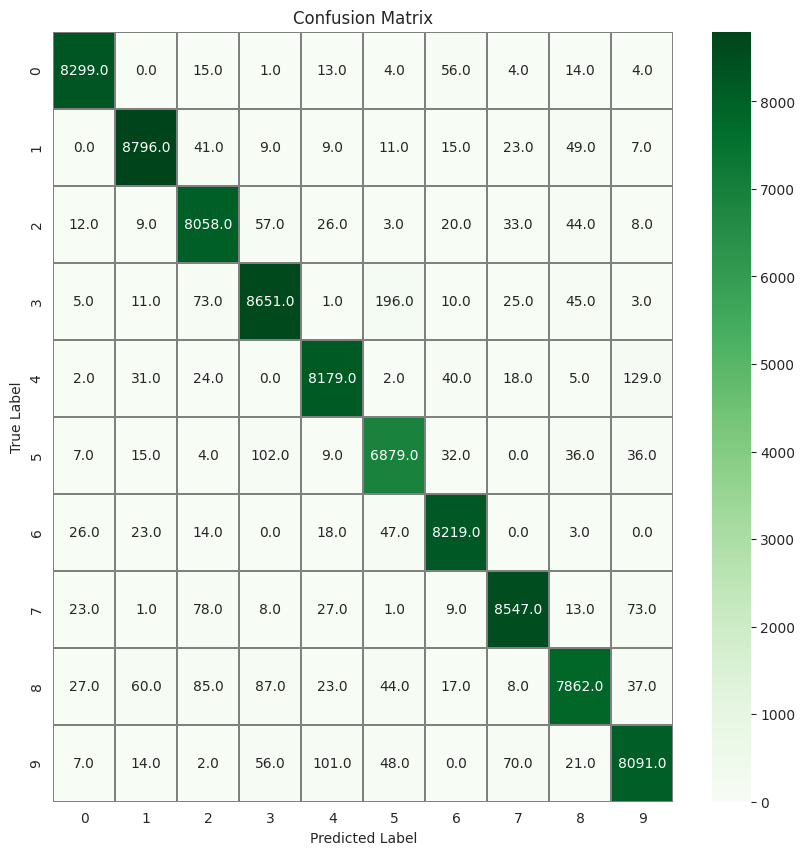

In [42]:
preds = [tensor.item() for tensor in all_preds]
targets = [tensor.item() for tensor in all_targets]
confusion_mtx = confusion_matrix(targets, preds)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

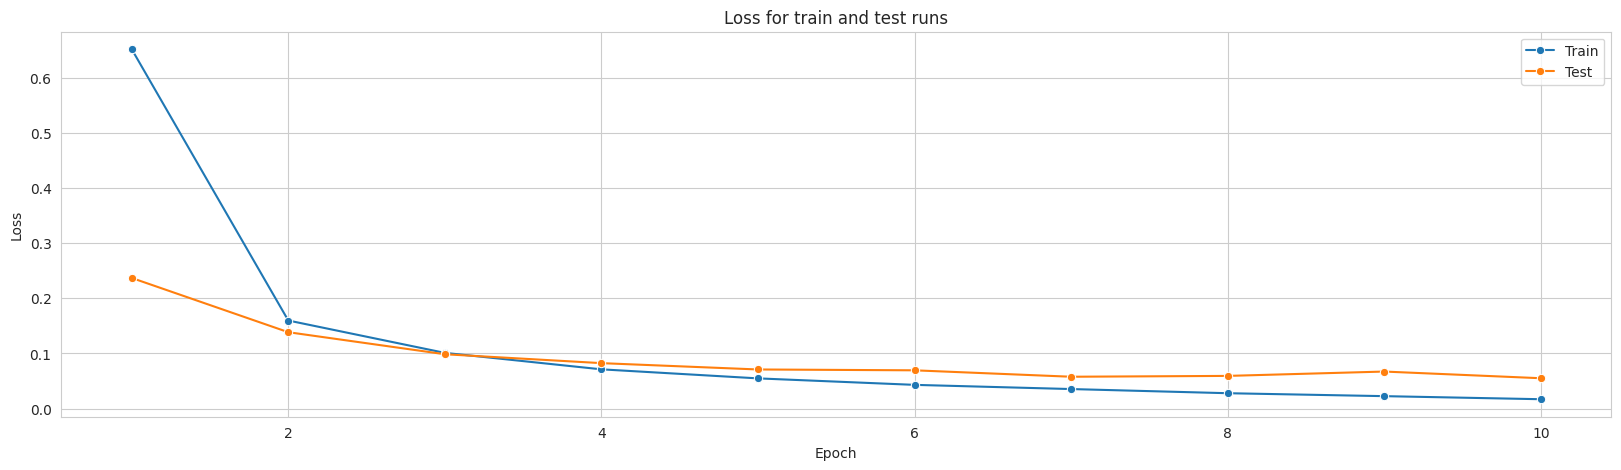

In [43]:
plt.figure(figsize=(20,5))
sns.lineplot(x=range(1, NUM_EPOCH + 1), y=train_loss_collector, label='Train', marker='o')
sns.lineplot(x=range(1, NUM_EPOCH + 1), y=test_loss_collector, label='Test', marker='o')
plt.title('Loss for train and test runs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()